<h1 style="text-align: center;">WSI - Algorytmy ewolucyjne i genetyczne</h1>

### Definicja funkcji oraz import modułów:

In [15]:
%matplotlib ipympl

from evolutionary_algorithm import EvolutionaryAlgorithm
from function import Function
from population_generator import PopulationGenerator, SpecialPopulationGenerator
from solver import Solver
from matplotlib import pyplot as plt
import numpy as np


DOMAIN_2D = [(-5, 5), (-5, 5)]
DOMAIN_4D = [(-5, 5), (-5, 5), (-5, 5), (-5, 5)]

def f1(x1, y1):
    return (x1**2 + y1 -11)**2 + (x1 + y1**2 - 7)**2

def f2(x2, y2):
    return  2 * x2**2 + 1.05 * x2**4 + x2**6 / 6 + x2*y2 + y2**2

def fsum(x1, y1, x2, y2):
    return f1(x1, y1) + f2(x2, y2)



### 1. Optymalizacja funkcji będącej sumą f1 i f2:

In [7]:
HYPERPARAMETERS = {
    'mutation_rate': 2,
    'mutation_probability': 0.05,
    'max_iterations': 10000,
    'crossing_probability': 0.8,
}

POPULATION_SIZE = 100

function1 = Function(f1, DOMAIN_2D)
function2 = Function(f2, DOMAIN_2D)
function_sum = Function(fsum, DOMAIN_4D)

pop_generator = PopulationGenerator(function_sum)
population = pop_generator.generate_population(POPULATION_SIZE)
algorithm = EvolutionaryAlgorithm(function_sum, population, *HYPERPARAMETERS.values())

best, data = algorithm.run()
x1, y1, x2, y2 = best.chromosome
print(f"Znalezione rozwiązanie:\n\tx1 = {x1},\n\ty1 = {y1},\n\tx2 = {x2},\n\ty2 = {y2},\n\twartość funkcji: {best.fitness_value}")

Znalezione rozwiązanie:
	x1 = -2.804998662724143,
	y1 = 3.1312979979879665,
	x2 = 0.000227555229757138,
	y2 = -0.00019393308713091574,
	wartość funkcji: 5.663998734889461e-07


Wykres przedstawiający zależność wartości funkcji najlepszego osobnika od numeru iteracji oraz śrendiej wartości funkcji całej populacji:

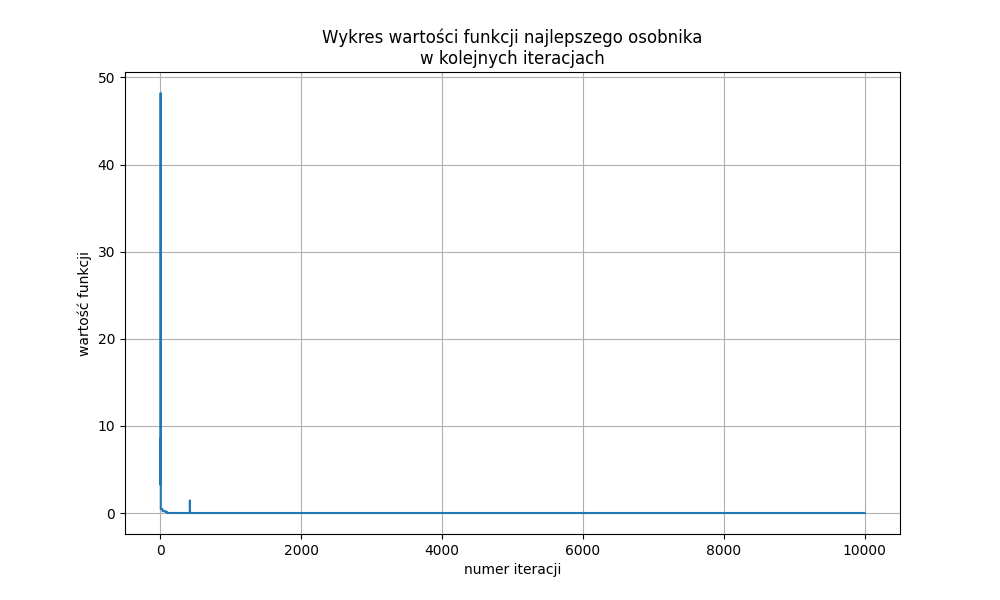

In [8]:
FIG_SIZE = (10, 6)
fig = plt.figure(figsize=FIG_SIZE)
ax = fig.add_subplot()
iter_num = [i for i in range(len(data))]
best_fitness = [iteration.best_individual.fitness_value for iteration in data]
ax.plot(iter_num, best_fitness)
ax.set(xlabel='numer iteracji', ylabel='wartość funkcji', title='Wykres wartości funkcji najlepszego osobnika\nw kolejnych iteracjach')
ax.grid()
plt.show()

#### Wnioski:
 - jak widzimy na wykresie, dla zadanych hipermarametrów algorytm dobrze znajduje minimum funkcji, już w 8 iteracji wartość funkcji wynosi około 0.4, dalej z wyjątkiem numeru itracji równego 421 wartość funkcji najlepszego osobnika spada bez nagłych skoków do góry

### 2. Badanie wpływu wartości siły mutacji na wynik działania algorytmu:


W tym doświadczeniu wykonam algorytm dla różnych wartości siły mutacji, przy zachowaniu pozostałych hiperparametrów stałych.

In [20]:
MUTATION_RATES = [0.1, 0.5, 1, 2, 5, 10]

HYPERPARAMETERS = {
    'mutation_rate': MUTATION_RATES,
    'mutation_probability': 0.05,
    'max_iterations': 10000,
    'crossing_probability': 0.8,
}

solver = Solver(HYPERPARAMETERS, function_sum, population)
experiments = solver.init_experiments()
results = solver.run_experiments(experiments)

Wykes przedstawiający zależność wartości funkcji najlepszego osobika od numeru iteracji dla poszczególnych wartości paramteru siły mutacji:

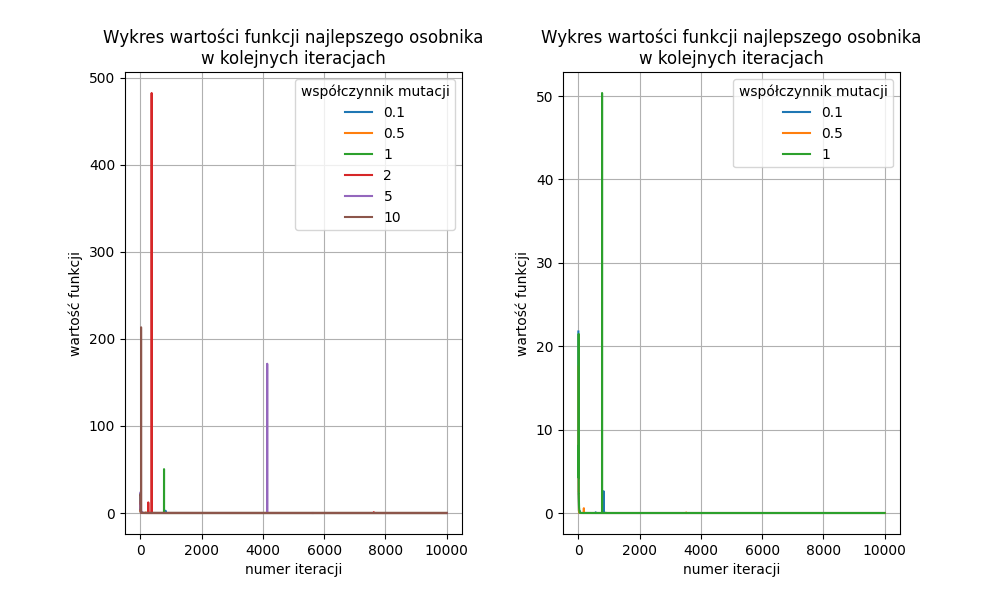

In [21]:
fig2 = plt.figure(figsize=FIG_SIZE)
iter_num = [i for i in range(HYPERPARAMETERS['max_iterations'])]
ax = fig2.add_subplot(121)

for result in results:
    best_fitnesses = [iteration.best_individual.fitness_value for iteration in result.data]
    ax.plot(iter_num, best_fitnesses, label=result.experiment.mutation_rate)

ax2 = fig2.add_subplot(122)

for result in results[:3]:
    best_fitnesses = [iteration.best_individual.fitness_value for iteration in result.data]
    ax2.plot(iter_num, best_fitnesses, label=result.experiment.mutation_rate)

for ax in [ax, ax2]:    
    ax.set(xlabel='numer iteracji', ylabel='wartość funkcji', title='Wykres wartości funkcji najlepszego osobnika\nw kolejnych iteracjach')
    ax.grid()
    ax.legend(title='współczynnik mutacji')
plt.subplots_adjust(wspace=0.3)
plt.show()


#### Wnioski:
 - wyższa wartość parametru mocy mutacji zwykle prowadzi do większej eksploracji przestrzeni rozwiązań, co oznacza, że algorytm jest bardziej skłonny do prób wykonywania bardziej losowych ruchów i poszukiwania nowych obszarów przestrzeni rozwiązań. Niższa wartość parametru skupia się bardziej na eksploatacji już znalezionych rozwiązań

 - jak widzimy na wykresach, dla tej konkretnej funkcji im mniejsza wartość paramteru siły mutacji, tym mniej jest nagłych "skoków" w wartościach
 - dla innej funkcji zbyt niska wartość parametru siły mutacji mogła by skutkować osiadaniem się punktów w minimach lokalnych
  


### 3. Badanie wpływu parametru prawdopodobieństwa mutacji na wynik działania algorytmu:

W tym doświadczeniu wykonam algorytm dla różnych wartości prawdopodobieństwa mutacji, przy zachowaniu pozostałych hiperparametrów stałych.

In [22]:
MUTATION_PROBABILITIES = [0.05, 0.1, 0.3, 0.5, 1]

HYPERPARAMETERS = {
    'mutation_rate': 5,
    'mutation_probability': MUTATION_PROBABILITIES,
    'max_iterations': 10000,
    'crossing_probability': 0.8,
}

solver = Solver(HYPERPARAMETERS, function_sum, population)
experiments = solver.init_experiments()
results = solver.run_experiments(experiments)

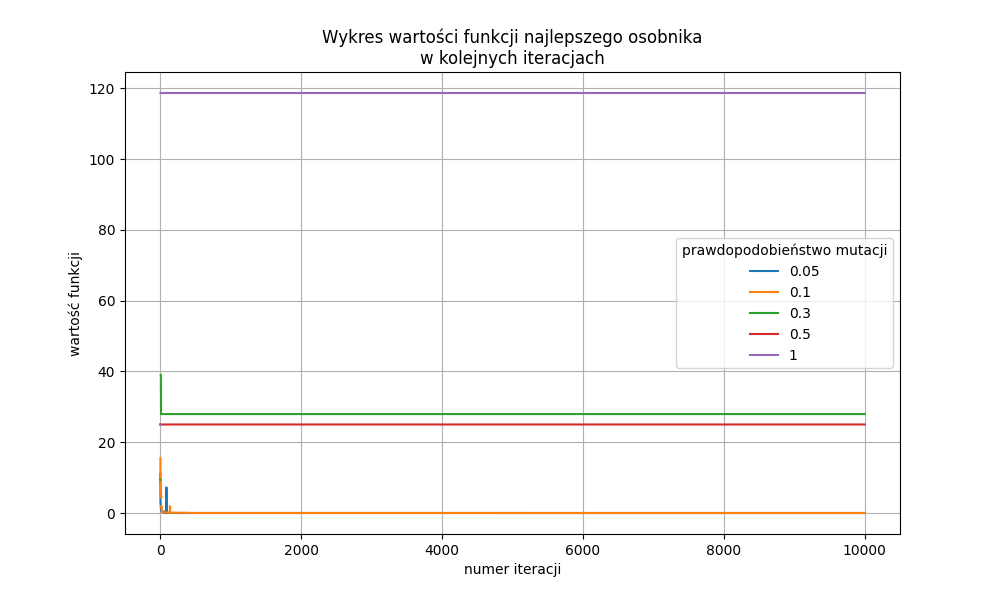

In [23]:
fig3 = plt.figure(figsize=FIG_SIZE)
iter_num = [i for i in range(HYPERPARAMETERS['max_iterations'])]
ax = fig3.add_subplot(111)
for result in results:
    best_fitnesses = [iteration.best_individual.fitness_value for iteration in result.data]
    ax.plot(iter_num, best_fitnesses, label=result.experiment.mutation_prob)
ax.set(xlabel='numer iteracji', ylabel='wartość funkcji', title='Wykres wartości funkcji najlepszego osobnika\nw kolejnych iteracjach')
ax.grid()
ax.legend(title='prawdopodobieństwo mutacji')
plt.show()

#### Wnioski:
- na podstawie wykresu widzimu, że jedynymi sensownymi wartościami prawdopodobieństwa mutacji są wartości 0.05 i 0.01, dla nich algorytm poprawnie odnajduje minimum globalne funkcji, natomiast dla wartości większych wartości te są błędne

### 4. Badanie wpływu maksymalnej liczby iteracji na wynik działania algorytmu:

Tym razem wykonam algorytm dla różnych wartości maksymalnej liczby iteracji przy stałych pozostałych wartościach hiperparametrów.

In [24]:
MAX_ITERATIONS = [10, 100, 500, 1000, 2000, 3000, 5000, 7000, 8000, 10000]

HYPERPARAMETERS = {
    'mutation_rate': 0.05,
    'mutation_probability': 0.1,
    'max_iterations': MAX_ITERATIONS,
    'crossing_probability': 0.8,
}

solver = Solver(HYPERPARAMETERS, function_sum, population)
experiments = solver.init_experiments()
results = solver.run_experiments(experiments)

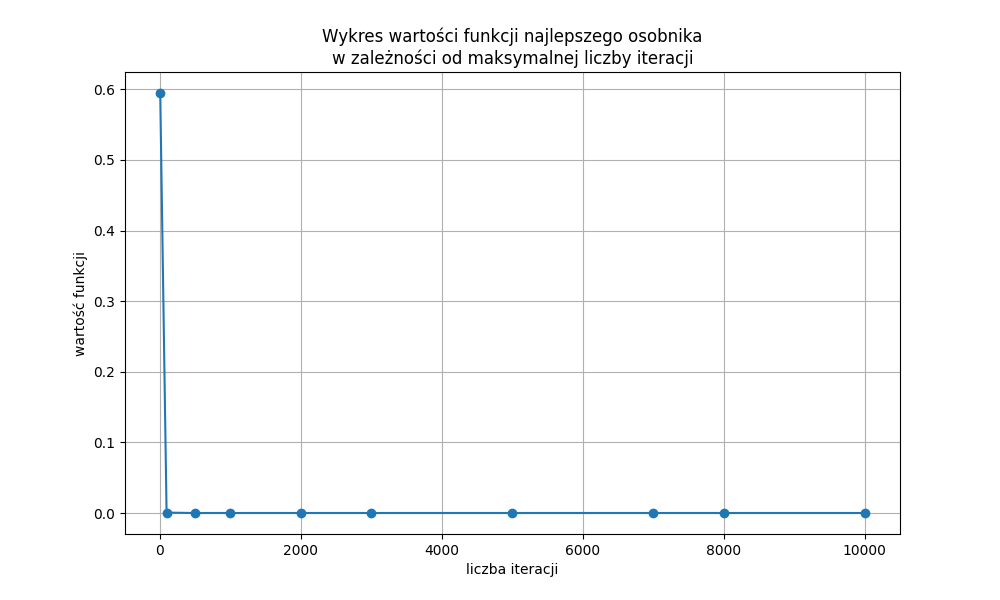

In [25]:
fig4 = plt.figure(figsize=FIG_SIZE)
iter_num = MAX_ITERATIONS
ax = fig4.add_subplot(111)
ax.plot(iter_num, [result.best_individual.fitness_value for result in results], marker='o')
ax.set(xlabel='liczba iteracji', ylabel='wartość funkcji', title='Wykres wartości funkcji najlepszego osobnika\nw zależności od maksymalnej liczby iteracji')
ax.grid()
plt.show()

#### Wnioski:
 - im większa wartość maksymalnej liczby iteracji, tym dokładniejszy (bliższy zeru) rezultat otrzymamy

 - natomiast większa liczba iteracji znacznie wpływa na kosztowność obliczeniową (czas trwania) algorytmu
 
 - kluczowy jest kompromis pomiędzy dokładnością, a kosztownością obliczeniową

### 5. Badanie wpływu wartości parametru prawdopodobieństwa krzyżowania na wynik działania algorytmu:

In [26]:
CROSSING_PROBABILITIES = [0, 0.1, 0.3, 0.5, 0.8, 0.85, 0.9, 0.95, 1]

HYPERPARAMETERS = {
    'mutation_rate': 0.05,
    'mutation_probability': 0.1,
    'max_iterations': 1000,
    'crossing_probability': CROSSING_PROBABILITIES,
}

solver = Solver(HYPERPARAMETERS, function_sum, population)
experiments = solver.init_experiments()
results = solver.run_experiments(experiments)

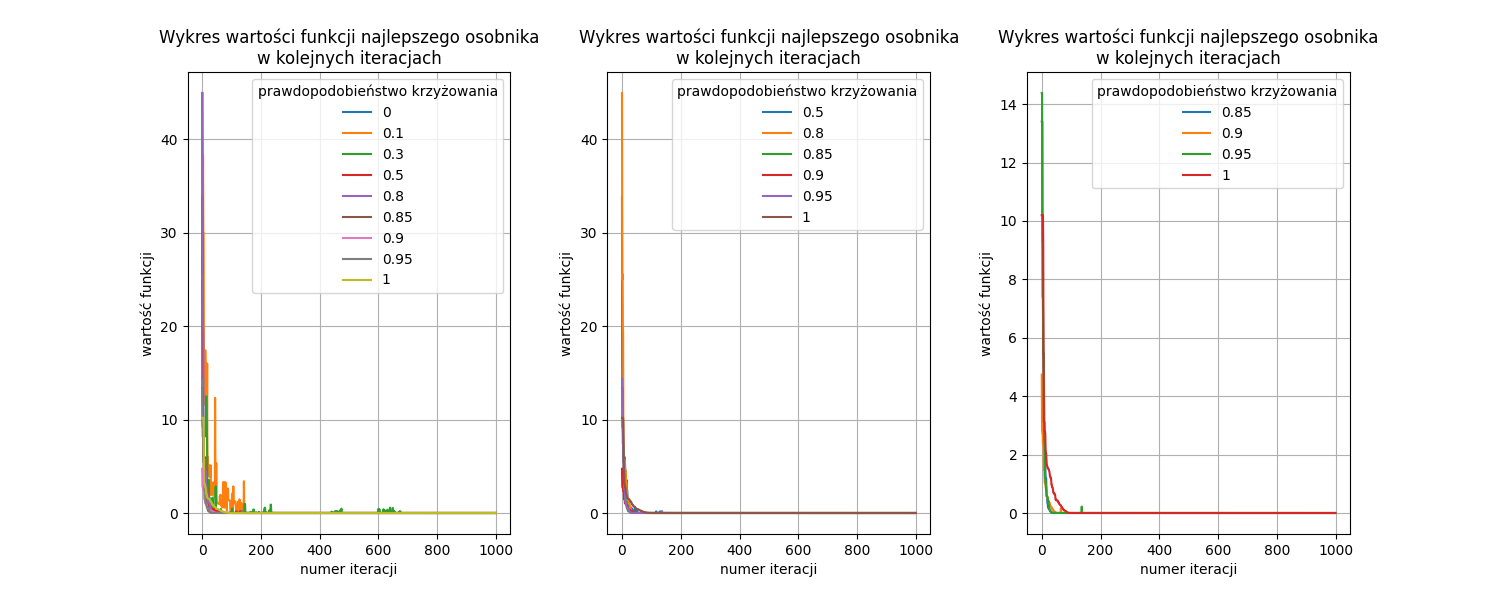

In [29]:
fig4 = plt.figure(figsize=(15, 6))
iter_num = [i for i in range(HYPERPARAMETERS['max_iterations'])]
ax = fig4.add_subplot(131)
for result in results:
    best_fitnesses = [iteration.best_individual.fitness_value for iteration in result.data]
    ax.plot(iter_num, best_fitnesses, label=result.experiment.crossing_prob)
ax2 = fig4.add_subplot(132)
for result in results[3:]:
    best_fitnesses = [iteration.best_individual.fitness_value for iteration in result.data]
    ax2.plot(iter_num, best_fitnesses, label=result.experiment.crossing_prob)
ax3 = fig4.add_subplot(133)
for result in results[5:]:
    best_fitnesses = [iteration.best_individual.fitness_value for iteration in result.data]
    ax3.plot(iter_num, best_fitnesses, label=result.experiment.crossing_prob)
for ax in [ax, ax2, ax3]:    
    ax.set(xlabel='numer iteracji', ylabel='wartość funkcji', title='Wykres wartości funkcji najlepszego osobnika\nw kolejnych iteracjach')
    ax.grid()
    ax.legend(title='prawdopodobieństwo krzyżowania')
plt.subplots_adjust(wspace=0.3)
plt.show()

#### Wnioski:
 - na podstawie wykresów widzimy, że algorytm jest najstabilniejszy i najszybciej zbiega do minimum dla wartości prawdopodobieństwa krzyżowania wynoszącego od 0.8 do 0.95 

### Zestaw hiperparametrów dający stosunkowo dobre wyniki dla funkcji f1 + f2:
 - siła mutacji: 0.05 - 0.1
 - prawdopodobieństwo mutacji: 0.8 - 0.95
 - maksymalna liczba iteracji: 1000 (kompromis pomiędzy dokładnością wyniku a czasem oczekiwania na wynik)
 - prawdopodobieństwo krzyżowania: 0.85 - 0.9

### 6. Optymalizacja funkcji f1 z dystrybucją populacji początkowej wokół punktu x1 =-0.3, y1 =-0.9:

In [10]:
HYPERPARAMETERS = {
    'mutation_rate': 0.05,
    'mutation_probability': 0.05,
    'max_iterations': 1000,
    'crossing_probability': 0.8,
}

POINT = (-0.3, -0.9)

function1 = Function(f1, [(-5, 5), (-5, 5)])
NUMBER_OF_EXPERIMENTS = 12

pop_generator = SpecialPopulationGenerator()

all_data = []
for i in range(NUMBER_OF_EXPERIMENTS):
    population = pop_generator.generate_population(POINT, POPULATION_SIZE)
    algorithm = EvolutionaryAlgorithm(function1, population, *HYPERPARAMETERS.values())
    best, data = algorithm.run()
    print(f"Eksperyment nr {i}, znalezione rozwiązanie:\n\tx1 = {best.chromosome[0]},\n\ty1 = {best.chromosome[1]},\n\twartość funkcji: {best.fitness_value}\n")
    all_data.append(data)

Eksperyment nr 0, znalezione rozwiązanie:
	x1 = 3.0000041363967944,
	y1 = 1.9999341494306504,
	wartość funkcji: 6.890018745179436e-08

Eksperyment nr 1, znalezione rozwiązanie:
	x1 = 2.9999522637515605,
	y1 = 2.0000249437822943,
	wartość funkcji: 7.10754183582505e-08

Eksperyment nr 2, znalezione rozwiązanie:
	x1 = 3.0000633424253227,
	y1 = 1.9999617344854501,
	wartość funkcji: 1.2487183857071526e-07

Eksperyment nr 3, znalezione rozwiązanie:
	x1 = 3.0000320397298212,
	y1 = 1.9999762686137397,
	wartość funkcji: 3.234950746273417e-08

Eksperyment nr 4, znalezione rozwiązanie:
	x1 = 3.000010124290718,
	y1 = 1.9999334625003093,
	wartość funkcji: 6.558043946857459e-08

Eksperyment nr 5, znalezione rozwiązanie:
	x1 = 2.999951207856049,
	y1 = 1.999998545045227,
	wartość funkcji: 8.953930591069993e-08

Eksperyment nr 6, znalezione rozwiązanie:
	x1 = 2.9999777696865437,
	y1 = 1.9999963046270144,
	wartość funkcji: 2.0159910732980346e-08

Eksperyment nr 7, znalezione rozwiązanie:
	x1 = 2.9998926

    Każdy z poniższych wykresów przedstawia dystrybucję populacji w kolejnych iteracjach w każdym z przeprowadzonych eksperymentów:

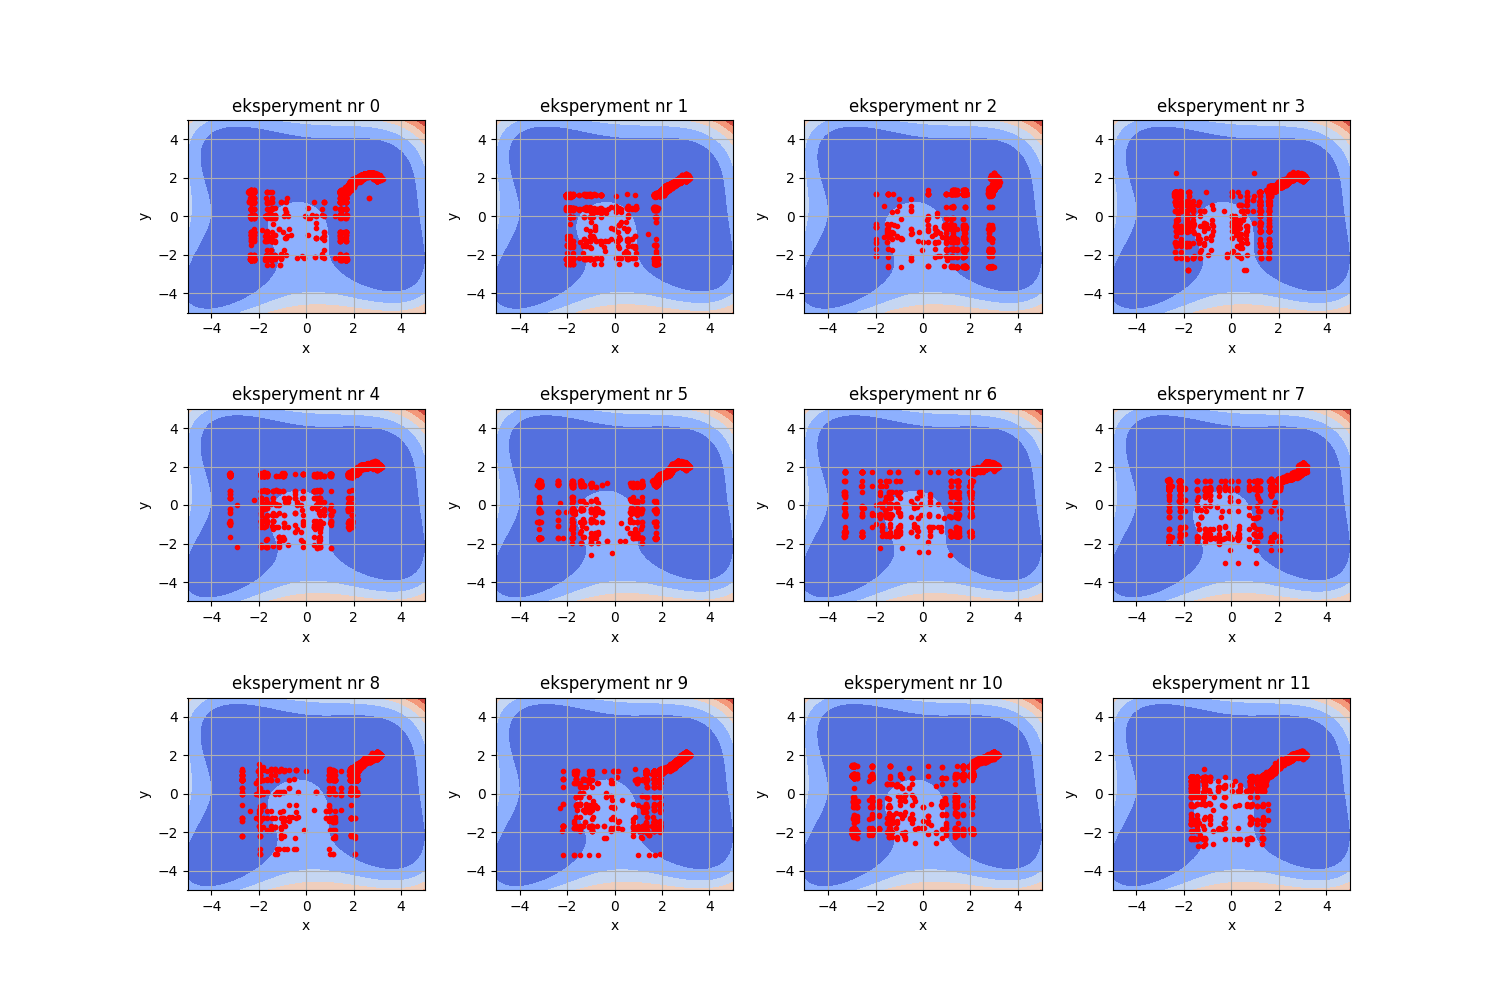

In [15]:
ROWS = 3
COLS = 4

X_LINSPACE = np.linspace(-5, 5, 100)
Y_LINSPACE = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X_LINSPACE, Y_LINSPACE)

fig7 = plt.figure(figsize=(15, 10))
for i, data in enumerate(all_data):
    ax = fig7.add_subplot(ROWS, COLS, i + 1)
    X = [individual.chromosome[0] for iteration in data for individual in iteration.population.individuals]
    Y = [individual.chromosome[1] for iteration in data for individual in iteration.population.individuals]

    ax.set(xlabel='x', ylabel='y', title='eksperyment nr ' + str(i))
    X_GRID, Y_GRID = np.meshgrid(X_LINSPACE, Y_LINSPACE)
    ax.contourf(X_LINSPACE, Y_LINSPACE, f1(X_GRID, Y_GRID), cmap='coolwarm')
    ax.scatter(X, Y, marker='.', color="red")
    ax.grid()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()


#### Wnioski:
 - jak widzimy na podstawie wykresów, osobniki w kolenjnych iteracjach przeważnie osiadają w dwóch punktach, co oznacza, że funkcja f1 ma więcej niż jedno minimum globalne 

### 7. Optymalizacja funkcji f1 z jednorodną dystrybucją populacji początkowej po całym obszarze dziedziny:

In [16]:
HYPERPARAMETERS = {
    'mutation_rate': 0.05,
    'mutation_probability': 0.05,
    'max_iterations': 1000,
    'crossing_probability': 0.8,
}


function1 = Function(f1, [(-5, 5), (-5, 5)])
NUMBER_OF_EXPERIMENTS = 12
pop_generator = PopulationGenerator(function1)
POPULATION_SIZE = 100

all_data = []
for i in range(NUMBER_OF_EXPERIMENTS):
    population = pop_generator.generate_population(POPULATION_SIZE)
    algorithm = EvolutionaryAlgorithm(function1, population, *HYPERPARAMETERS.values())
    best, data = algorithm.run()
    print(f"Eksperyment nr {i}, znalezione rozwiązanie:\n\tx1 = {best.chromosome[0]},\n\ty1 = {best.chromosome[1]},\n\twartość funkcji: {best.fitness_value}\n")
    all_data.append(data)


Eksperyment nr 0, znalezione rozwiązanie:
	x1 = 3.000002226604243,
	y1 = 1.999987560592175,
	wartość funkcji: 2.2600306328447e-09

Eksperyment nr 1, znalezione rozwiązanie:
	x1 = 3.584424403114149,
	y1 = -1.8481199155546242,
	wartość funkcji: 1.2722801413033958e-09

Eksperyment nr 2, znalezione rozwiązanie:
	x1 = 3.000023928377283,
	y1 = 1.9999887698071492,
	wartość funkcji: 1.7954721215735326e-08

Eksperyment nr 3, znalezione rozwiązanie:
	x1 = 3.584427897667978,
	y1 = -1.8481308852120362,
	wartość funkcji: 3.021660310015025e-10

Eksperyment nr 4, znalezione rozwiązanie:
	x1 = 3.00003412164863,
	y1 = 1.9999730302579157,
	wartość funkcji: 3.703911966258878e-08

Eksperyment nr 5, znalezione rozwiązanie:
	x1 = -2.8051077764640002,
	y1 = 3.131286161007156,
	wartość funkcji: 3.103878668148257e-08

Eksperyment nr 6, znalezione rozwiązanie:
	x1 = 3.000005393038098,
	y1 = 1.9999954116223007,
	wartość funkcji: 9.391395405549759e-10

Eksperyment nr 7, znalezione rozwiązanie:
	x1 = 3.00002224283

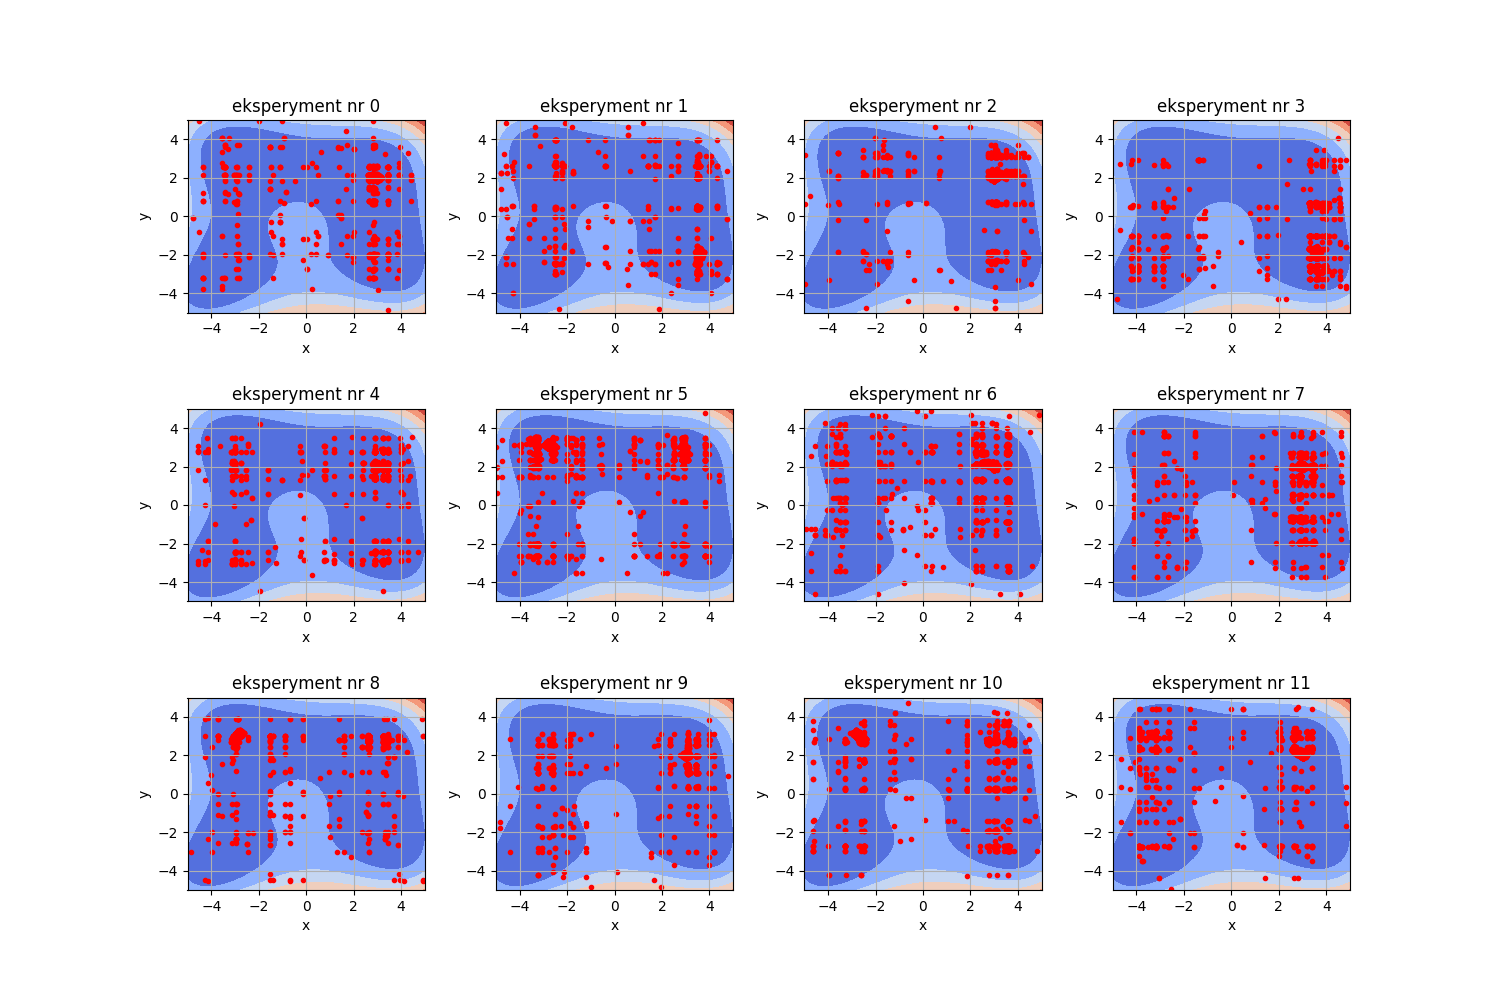

In [18]:

ROWS = 3
COLS = 4
X_LINSPACE = np.linspace(-5, 5, 100)
Y_LINSPACE = np.linspace(-5, 5, 100)
def f1(x1, y1):
    return (x1**2 + y1 -11)**2 + (x1 + y1**2 - 7)**2


fig7 = plt.figure(figsize=(15, 10))
for i, data in enumerate(all_data):
    ax = fig7.add_subplot(ROWS, COLS, i + 1)
    X = [individual.chromosome[0] for iteration in data for individual in iteration.population.individuals]
    Y = [individual.chromosome[1] for iteration in data for individual in iteration.population.individuals]
    ax.set(xlabel='x', ylabel='y', title='eksperyment nr ' + str(i))
    X_GRID, Y_GRID = np.meshgrid(X_LINSPACE, Y_LINSPACE)
    ax.contourf(X_LINSPACE, Y_LINSPACE, f1(X_GRID, Y_GRID), cmap='coolwarm')
    ax.scatter(X, Y, marker='.', color="red")
    ax.grid()
plt.subplots_adjust(wspace=0.3, hspace=0.5)

#### Wnioski:
 - w tym przypadku osobniki osadzają się w czterech różnych punktach będących minimami globalnymi funkcji f1, zatem widać, że dytrybucja populacji początkowej ma duży wpływ na osiągnięte rezultaty
 - funkcja ma 4 różne minima globalne w punktach: (3, 2), (-2, 3), (3, -2, )
 

### 8. Wielokrotna optymalizacja funkcji f1 ze stałą wartością hiperparametrów:

In [ ]:
HYPERPARAMETERS = {
    'mutation_rate': 0.05,
    'mutation_probability': 0.05,
    'max_iterations': 1000,
    'crossing_probability': 0.8,
}

NUMBER_OF_EXPERIMENTS = 100

experiment = EvolutionaryAlgorithm(function1, population, *HYPERPARAMETERS.values())
solver = Solver(HYPERPARAMETERS, function1, population)
results = solver.run_experiment_n_times(experiment, NUMBER_OF_EXPERIMENTS)
mean = np.mean([result.best_individual.fitness_value for result in results])
print(f"Średnia wartość funkcji dla {NUMBER_OF_EXPERIMENTS} uruchomień algorytmu: {mean}")


In [ ]:
fig8 = plt.figure(figsize=FIG_SIZE)
ax = fig8.add_subplot(111)
ax.plot(range(1, NUMBER_OF_EXPERIMENTS + 1), [result.best_individual.fitness_value for result in results], marker='o')
ax.set(xlabel='numer eksperymentu', ylabel='wartość funkcji', title='Wykres wartości funkcji najlepszego osobnika\nw kolejnych eksperymentach')
ax.grid()
plt.show()

### 9. Optymalizacja funkcji f2:

In [5]:
HYPERPARAMETERS = {
    'mutation_rate': 0.05,
    'mutation_probability': 0.05,
    'max_iterations': 1000,
    'crossing_probability': 0.8,
}


function2 = Function(f2, [(-5, 5), (-5, 5)])
NUMBER_OF_EXPERIMENTS = 12
pop_generator = PopulationGenerator(function2)
POPULATION_SIZE = 100

all_data = []
for i in range(NUMBER_OF_EXPERIMENTS):
    population = pop_generator.generate_population(POPULATION_SIZE)
    algorithm = EvolutionaryAlgorithm(function2, population, *HYPERPARAMETERS.values())
    best, data = algorithm.run()
    print(f"Eksperyment nr {i}, znalezione rozwiązanie:\n\tx1 = {best.chromosome[0]},\n\ty1 = {best.chromosome[1]},\n\twartość funkcji: {best.fitness_value}\n")
    all_data.append(data)

Eksperyment nr 0, znalezione rozwiązanie:
	x1 = -2.1637543472276645e-05,
	y1 = 3.961920244948823e-05,
	wartość funkcji: 1.6487855626552822e-09

Eksperyment nr 1, znalezione rozwiązanie:
	x1 = -3.27738508717947e-05,
	y1 = 3.127861974598348e-05,
	wartość funkcji: 2.1014818373281007e-09

Eksperyment nr 2, znalezione rozwiązanie:
	x1 = -2.341076874120235e-05,
	y1 = -0.00010278661771939495,
	wartość funkcji: 1.4067530705735669e-08

Eksperyment nr 3, znalezione rozwiązanie:
	x1 = 1.8910034334298107e-05,
	y1 = -3.254175607330218e-05,
	wartość funkcji: 1.1587789608727313e-09

Eksperyment nr 4, znalezione rozwiązanie:
	x1 = -9.875026798626668e-06,
	y1 = 1.250785885617198e-05,
	wartość funkcji: 2.2796340032495623e-10

Eksperyment nr 5, znalezione rozwiązanie:
	x1 = 4.859399412501515e-07,
	y1 = -3.008502034469859e-05,
	wartość funkcji: 8.9096121137512e-10

Eksperyment nr 6, znalezione rozwiązanie:
	x1 = 1.4807944786751965e-05,
	y1 = -1.1564400861628749e-05,
	wartość funkcji: 4.010408155030495e-10

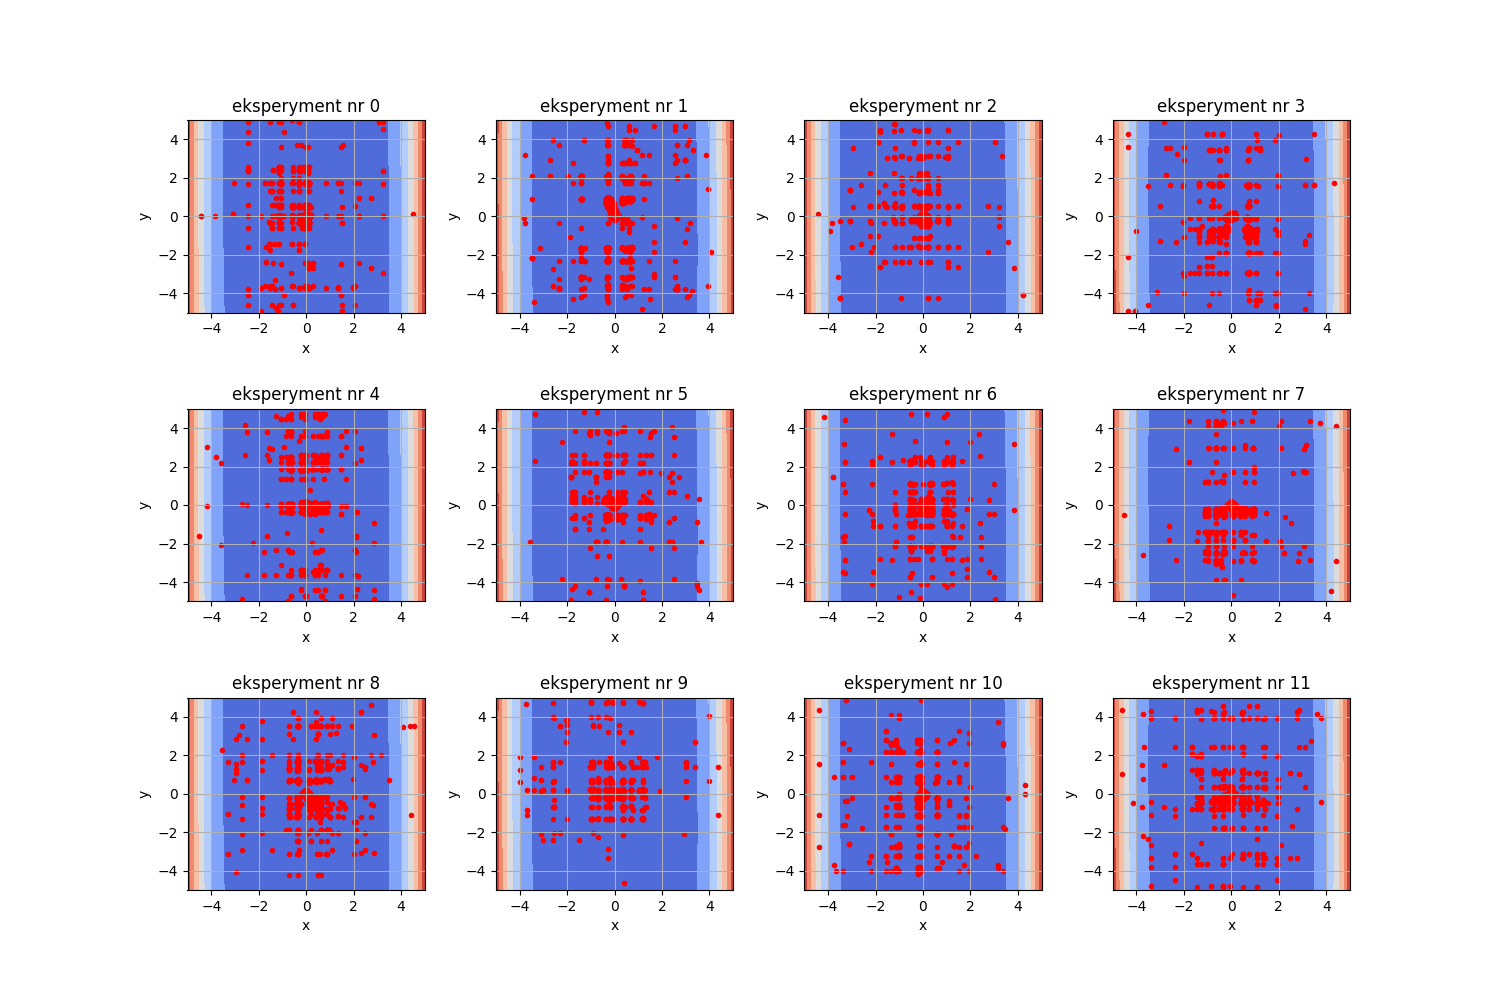

In [9]:
fig8 = plt.figure(figsize=(15, 10))
X_LINSPACE = np.linspace(-5, 5, 100)
Y_LINSPACE = np.linspace(-5, 5, 100)

def f2(x2, y2):
    return  2 * x2**2 + 1.05 * x2**4 + x2**6 / 6 + x2*y2 + y2**2

ROWS = 3
COLS = 4


for i, data in enumerate(all_data):
    ax = fig8.add_subplot(ROWS, COLS, i + 1)
    X = [individual.chromosome[0] for iteration in data for individual in iteration.population.individuals]
    Y = [individual.chromosome[1] for iteration in data for individual in iteration.population.individuals]
    ax.set(xlabel='x', ylabel='y', title='eksperyment nr ' + str(i))
    X_GRID, Y_GRID = np.meshgrid(X_LINSPACE, Y_LINSPACE)
    ax.contourf(X_LINSPACE, Y_LINSPACE, f2(X_GRID, Y_GRID), cmap='coolwarm')
    ax.scatter(X, Y, marker='.', color="red")
    ax.grid()
plt.subplots_adjust(wspace=0.3, hspace=0.5)


#### Wnioski:
 - funkcja f2 ma w dziedzinie X, Y = (-5, 5), (-5, 5) jedno minimum globalne w X = 0, Y = 0, wartość tego minimum wynosi 0

### 10. Wielokrotna optymalizacja funkcji f2 ze stałą wartością hiperparametrów:

In [11]:
HYPERPARAMETERS = {
    'mutation_rate': 2,
    'mutation_probability': 0.8,
    'max_iterations': 1000,
    'crossing_probability': 0.8,
}

NUMBER_OF_EXPERIMENTS = 20

experiment = EvolutionaryAlgorithm(function2, population, *HYPERPARAMETERS.values())
solver = Solver(HYPERPARAMETERS, function2, population)
results = solver.run_experiment_n_times(experiment, NUMBER_OF_EXPERIMENTS)
mean = np.mean([result.best_individual.fitness_value for result in results])
print(f"Średnia wartość funkcji dla {NUMBER_OF_EXPERIMENTS} uruchomień algorytmu: {mean}")

Średnia wartość funkcji dla 20 uruchomień algorytmu: 0.0007199339581695374


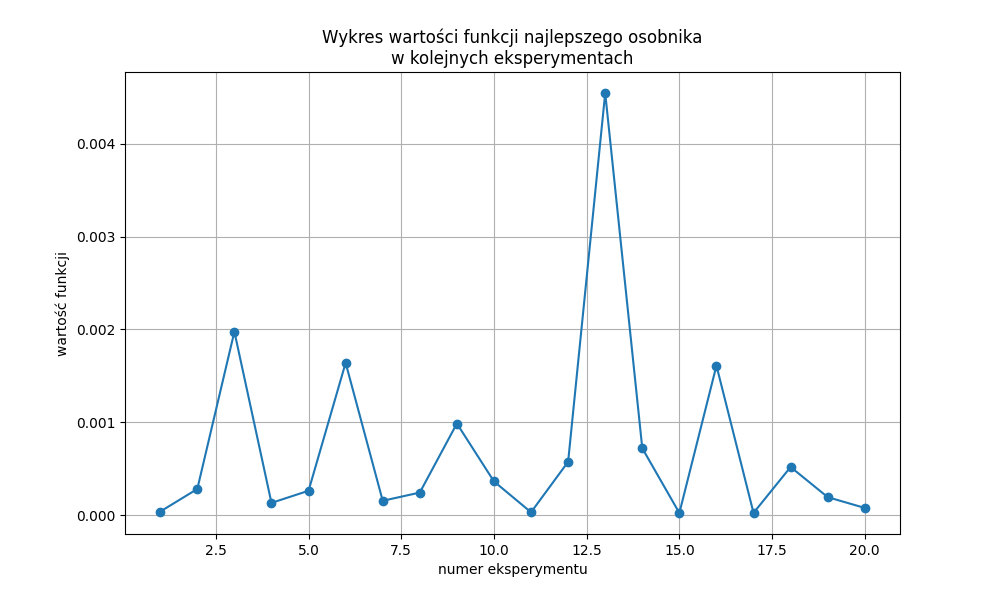

In [13]:
fig9 = plt.figure(figsize=(10, 6))
ax = fig9.add_subplot(111)
ax.plot(range(1, NUMBER_OF_EXPERIMENTS + 1), [result.best_individual.fitness_value for result in results], marker='o')
ax.set(xlabel='numer eksperymentu', ylabel='wartość funkcji', title='Wykres wartości funkcji najlepszego osobnika\nw kolejnych eksperymentach')
ax.grid()
plt.show()

### 11. Wnioski:
 - Eksperymenty z algorytmem ewolucyjnym pozwalają na zrozumienie, jak różne ustawienia parametrów, takie jak rozmiar populacji, prawdopodobieństwo krzyżowania, prawdopodobieństwo mutacji, wpływają na jakość rozwiązań. Można dowiedzieć się, które parametry są krytyczne dla danego problemu.
 
 - Obserwacja rozkładu osobników w populacji w kolejnych iteracjach może dostarczyć informacji o tym, jak algorytm ewolucyjny eksploruje przestrzeń rozwiązań
 
 - Badanie powtarzalności wyników z różnych uruchomień algorytmu pozwala na ocenę jego stabilności. Czy algorytm daje podobne wyniki w różnych próbach, czy jest podatny na losowe czynniki
